<!-- dom:TITLE: Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis -->
# Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Dec 24, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Why Linear Regression (aka Ordinary Least Squares and family)

Fitting a continuous function with linear parameterization in terms of the parameters  $\boldsymbol{\beta}$.
* Method of choice for fitting a continuous function!

* Gives an excellent introduction to central Machine Learning features with **understandable pedagogical** links to other methods like **Neural Networks**, **Support Vector Machines** etc

* Analytical expression for the fitting parameters $\boldsymbol{\beta}$

* Analytical expressions for statistical propertiers like mean values, variances, confidence intervals and more

* Analytical relation with probabilistic interpretations 

* Easy to introduce basic concepts like bias-variance tradeoff, cross-validation, resampling and regularization techniques and many other ML topics

* Easy to code! And links well with classification problems and logistic regression and neural networks

* Allows for **easy** hands-on understanding of gradient descent methods

* and many more features

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.


## Regression analysis, overarching aims

Regression modeling deals with the description of  the sampling distribution of a given random variable $y$ and how it varies as function of another variable or a set of such variables $\boldsymbol{x} =[x_0, x_1,\dots, x_{n-1}]^T$. 
The first variable is called the **dependent**, the **outcome** or the **response** variable while the set of variables $\boldsymbol{x}$ is called the independent variable, or the predictor variable or the explanatory variable. 

A regression model aims at finding a likelihood function $p(\boldsymbol{y}\vert \boldsymbol{x})$, that is the conditional distribution for $\boldsymbol{y}$ with a given $\boldsymbol{x}$. The estimation of  $p(\boldsymbol{y}\vert \boldsymbol{x})$ is made using a data set with 
* $n$ cases $i = 0, 1, 2, \dots, n-1$ 

* Response (target, dependent or outcome) variable $y_i$ with $i = 0, 1, 2, \dots, n-1$ 

* $p$ so-called explanatory (independent or predictor) variables $\boldsymbol{x}_i=[x_{i0}, x_{i1}, \dots, x_{ip-1}]$ with $i = 0, 1, 2, \dots, n-1$ and explanatory variables running from $0$ to $p-1$. See below for more explicit examples.   

 The goal of the regression analysis is to extract/exploit relationship between $\boldsymbol{y}$ and $\boldsymbol{x}$ in or to infer causal dependencies, approximations to the likelihood functions, functional relationships and to make predictions, making fits and many other things.



## Regression analysis, overarching aims II


Consider an experiment in which $p$ characteristics of $n$ samples are
measured. The data from this experiment, for various explanatory variables $p$ are normally represented by a matrix  
$\mathbf{X}$.

The matrix $\mathbf{X}$ is called the *design
matrix*. Additional information of the samples is available in the
form of $\boldsymbol{y}$ (also as above). The variable $\boldsymbol{y}$ is
generally referred to as the *response variable*. The aim of
regression analysis is to explain $\boldsymbol{y}$ in terms of
$\boldsymbol{X}$ through a functional relationship like $y_i =
f(\mathbf{X}_{i,\ast})$. When no prior knowledge on the form of
$f(\cdot)$ is available, it is common to assume a linear relationship
between $\boldsymbol{X}$ and $\boldsymbol{y}$. This assumption gives rise to
the *linear regression model* where $\boldsymbol{\beta} = [\beta_0, \ldots,
\beta_{p-1}]^{T}$ are the *regression parameters*. 

Linear regression gives us a set of analytical equations for the parameters $\beta_j$.





## Examples
In order to understand the relation among the predictors $p$, the set of data $n$ and the target (outcome, output etc) $\boldsymbol{y}$,
consider the model we discussed for describing nuclear binding energies. 

There we assumed that we could parametrize the data using a polynomial approximation based on the liquid drop model.
Assuming

$$
BE(A) = a_0+a_1A+a_2A^{2/3}+a_3A^{-1/3}+a_4A^{-1},
$$

we have five predictors, that is the intercept, the $A$ dependent term, the $A^{2/3}$ term and the $A^{-1/3}$ and $A^{-1}$ terms.
This gives $p=0,1,2,3,4$. Furthermore we have $n$ entries for each predictor. It means that our design matrix is a 
$p\times n$ matrix $\boldsymbol{X}$.

Here the predictors are based on a model we have made. A popular data set which is widely encountered in ML applications is the
so-called [credit card default data from Taiwan](https://www.sciencedirect.com/science/article/pii/S0957417407006719?via%3Dihub). The data set contains data on $n=30000$ credit card holders with predictors like gender, marital status, age, profession, education, etc. In total there are $24$ such predictors or attributes leading to a design matrix of dimensionality $24 \times 30000$. This is however a classification problem and we will come back to it when we discuss Logistic Regression.







## General linear models
Before we proceed let us study a case from linear algebra where we aim at fitting a set of data $\boldsymbol{y}=[y_0,y_1,\dots,y_{n-1}]$. We could think of these data as a result of an experiment or a complicated numerical experiment. These data are functions of a series of variables $\boldsymbol{x}=[x_0,x_1,\dots,x_{n-1}]$, that is $y_i = y(x_i)$ with $i=0,1,2,\dots,n-1$. The variables $x_i$ could represent physical quantities like time, temperature, position etc. We assume that $y(x)$ is a smooth function. 

Since obtaining these data points may not be trivial, we want to use these data to fit a function which can allow us to make predictions for values of $y$ which are not in the present set. The perhaps simplest approach is to assume we can parametrize our function in terms of a polynomial of degree $n-1$ with $n$ points, that is

$$
y=y(x) \rightarrow y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{n-1} \beta_j x_i^j+\epsilon_i,
$$

where $\epsilon_i$ is the error in our approximation.




## Rewriting the fitting procedure as a linear algebra problem
For every set of values $y_i,x_i$ we have thus the corresponding set of equations

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0^1+\beta_2x_0^2+\dots+\beta_{n-1}x_0^{n-1}+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1^1+\beta_2x_1^2+\dots+\beta_{n-1}x_1^{n-1}+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2^1+\beta_2x_2^2+\dots+\beta_{n-1}x_2^{n-1}+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}^1+\beta_2x_{n-1}^2+\dots+\beta_{n-1}x_{n-1}^{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Rewriting the fitting procedure as a linear algebra problem, more details
Defining the vectors

$$
\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

and

$$
\boldsymbol{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T,
$$

and

$$
\boldsymbol{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T,
$$

and the design matrix

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0}^1 &x_{0}^2& \dots & \dots &x_{0}^{n-1}\\
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{n-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^1 &x_{n-1}^2& \dots & \dots &x_{n-1}^{n-1}\\
\end{bmatrix}
$$

we can rewrite our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The above design matrix is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).




## Generalizing the fitting procedure as a linear algebra problem

We are obviously not limited to the above polynomial expansions.  We
could replace the various powers of $x$ with elements of Fourier
series or instead of $x_i^j$ we could have $\cos{(j x_i)}$ or $\sin{(j
x_i)}$, or time series or other orthogonal functions.  For every set
of values $y_i,x_i$ we can then generalize the equations to

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_2\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_i\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

**Note that we have $p=n$ here. The matrix is symmetric. This is generally not the case!**




## Generalizing the fitting procedure as a linear algebra problem
We redefine in turn the matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=
\begin{bmatrix} 
x_{00}& x_{01} &x_{02}& \dots & \dots &x_{0,n-1}\\
x_{10}& x_{11} &x_{12}& \dots & \dots &x_{1,n-1}\\
x_{20}& x_{21} &x_{22}& \dots & \dots &x_{2,n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
x_{n-1,0}& x_{n-1,1} &x_{n-1,2}& \dots & \dots &x_{n-1,n-1}\\
\end{bmatrix}
$$

and without loss of generality we rewrite again  our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The left-hand side of this equation is kwown. Our error vector $\boldsymbol{\epsilon}$ and the parameter vector $\boldsymbol{\beta}$ are our unknow quantities. How can we obtain the optimal set of $\beta_i$ values?




## Optimizing our parameters
We have defined the matrix $\boldsymbol{X}$ via the equations

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_1\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_1\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

As we noted above, we stayed with a system with the design matrix 
 $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$, that is we have $p=n$. For reasons to come later (algorithmic arguments) we will hereafter define 
our matrix as $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors refering to the column numbers and the entries $n$ being the row elements.




## Our model for the nuclear binding energies

In our [introductory notes](https://compphysics.github.io/MachineLearning/doc/pub/How2ReadData/html/How2ReadData.html) we looked at the so-called [liquid drop model](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula). Let us remind ourselves about what we did by looking at the code.

We restate the parts of the code we are most interested in.

In [25]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')


# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']

# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)
# Then nice printout using pandas
DesignMatrix = pd.DataFrame(X)
DesignMatrix.index = A
DesignMatrix.columns = ['1', 'A', 'A^(2/3)', 'A^(-1/3)', '1/A']
display(DesignMatrix)

,1,A,A^(2/3),A^(-1/3),1/A
A,,,,,
1,1.0,1.0,1.000000,1.000000,1.000000
2,1.0,2.0,1.587401,0.793701,0.500000
3,1.0,3.0,2.080084,0.693361,0.333333
4,1.0,4.0,2.519842,0.629961,0.250000
5,1.0,5.0,2.924018,0.584804,0.200000
...,...,...,...,...,...
264,1.0,264.0,41.153106,0.155883,0.003788
265,1.0,265.0,41.256962,0.155687,0.003774
266,1.0,266.0,41.360688,0.155491,0.003759


With $\boldsymbol{\beta}\in {\mathbb{R}}^{p\times 1}$, it means that we will hereafter write our equations for the approximation as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

throughout these lectures. 


## Optimizing our parameters, more details
With the above we use the design matrix to define the approximation $\boldsymbol{\tilde{y}}$ via the unknown quantity $\boldsymbol{\beta}$ as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

and in order to find the optimal parameters $\beta_i$ instead of solving the above linear algebra problem, we define a function which gives a measure of the spread between the values $y_i$ (which represent hopefully the exact values) and the parameterized values $\tilde{y}_i$, namely

$$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

or using the matrix $\boldsymbol{X}$ and in a more compact matrix-vector notation as

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)\right\}.
$$

This function is one possible way to define the so-called cost function.



It is also common to define
the function $Q$ as

$$
C(\boldsymbol{\beta})=\frac{1}{2n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2,
$$

since when taking the first derivative with respect to the unknown parameters $\beta$, the factor of $2$ cancels out.




## Interpretations and optimizing our parameters

The function

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\},
$$

can be linked to the variance of the quantity $y_i$ if we interpret the latter as the mean value. 
When linking (see the discussion below) with the maximum likelihood approach below, we will indeed interpret $y_i$ as a mean value

$$
y_{i}=\langle y_i \rangle = \beta_0x_{i,0}+\beta_1x_{i,1}+\beta_2x_{i,2}+\dots+\beta_{n-1}x_{i,n-1}+\epsilon_i,
$$

where $\langle y_i \rangle$ is the mean value. Keep in mind also that
till now we have treated $y_i$ as the exact value. Normally, the
response (dependent or outcome) variable $y_i$ the outcome of a
numerical experiment or another type of experiment and is thus only an
approximation to the true value. It is then always accompanied by an
error estimate, often limited to a statistical error estimate given by
the standard deviation discussed earlier. In the discussion here we
will treat $y_i$ as our exact value for the response variable.

In order to find the parameters $\beta_i$ we will then minimize the spread of $C(\boldsymbol{\beta})$, that is we are going to solve the problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

In practical terms it means we will require

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_{ij}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right).
$$

## Interpretations and optimizing our parameters
We can rewrite

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We note also that since our design matrix is defined as $\boldsymbol{X}\in
{\mathbb{R}}^{n\times p}$, the product $\boldsymbol{X}^T\boldsymbol{X} \in
{\mathbb{R}}^{p\times p}$.  In the above case we have that $p \ll n$,
in our case $p=5$ meaning that we end up with inverting a small
$5\times 5$ matrix. This is a rather common situation, in many cases we end up with low-dimensional
matrices to invert. The methods discussed here and for many other
supervised learning algorithms like classification with logistic
regression or support vector machines, exhibit dimensionalities which
allow for the usage of direct linear algebra methods such as **LU** decomposition or **Singular Value Decomposition** (SVD) for finding the inverse of the matrix
$\boldsymbol{X}^T\boldsymbol{X}$.



**Small question**: Do you think the example we have at hand here (the nuclear binding energies) can lead to problems in inverting the matrix  $\boldsymbol{X}^T\boldsymbol{X}$? What kind of problems can we expect?



## Some useful matrix and vector expressions

The following matrix and vector relation will be useful here and for the rest of the course. Vectors are always written as boldfaced lower case letters and 
matrices as upper case boldfaced letters.

2
6
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

2
7
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

2
8
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\frac{\partial \log{\vert\boldsymbol{A}\vert}}{\partial \boldsymbol{A}} = (\boldsymbol{A}^{-1})^T.
$$

## Interpretations and optimizing our parameters
The residuals $\boldsymbol{\epsilon}$ are in turn given by

$$
\boldsymbol{\epsilon} = \boldsymbol{y}-\boldsymbol{\tilde{y}} = \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta},
$$

and with

$$
\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

we have

$$
\boldsymbol{X}^T\boldsymbol{\epsilon}=\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

meaning that the solution for $\boldsymbol{\beta}$ is the one which minimizes the residuals.  Later we will link this with the maximum likelihood approach.




Let us now return to our nuclear binding energies and simply code the above equations. 

## Own code for Ordinary Least Squares

It is rather straightforward to implement the matrix inversion and obtain the parameters $\boldsymbol{\beta}$. After having defined the matrix $\boldsymbol{X}$ we simply need to 
write

In [26]:
# matrix inversion to find beta
#beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Energies)
beta = np.linalg.inv(X.T @ X) @ (X.T @ Energies)
# and then make the prediction
ytilde = X @ beta

Alternatively, you can use the least squares functionality in **Numpy** as

In [3]:
fit = np.linalg.lstsq(X, Energies, rcond =None)[0]
ytildenp = np.dot(fit,X.T)

And finally we plot our fit with and compare with data

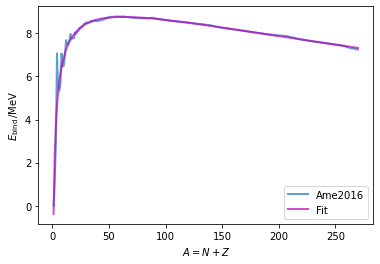

In [4]:
Masses['Eapprox']  = ytilde
# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Masses['A'], Masses['Ebinding'], alpha=0.7, lw=2,
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.7, lw=2, c='m',
            label='Fit')
ax.legend()
save_fig("Masses2016OLS")
plt.show()

## Adding error analysis and training set up

We can easily test our fit by computing the $R2$ score that we discussed in connection with the functionality of _Scikit_Learn_ in the introductory slides.
Since we are not using _Scikit-Learn here we can define our own $R2$ function as

In [27]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

and we would be using it as

In [28]:
print(R2(Energies,ytilde))

0.9547578478889096


We can easily add our **MSE** score as

In [7]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(Energies,ytilde))

0.037875961483052376


and finally the relative error as

In [8]:
def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)
print(RelativeError(Energies, ytilde))

A        
1    0            inf
2    1       1.123190
3    2       0.327631
4    6       0.344172
5    9       0.044402
               ...   
264  3304    0.009911
265  3310    0.009154
266  3317    0.007824
269  3338    0.011347
270  3344    0.009790
Name: Ebinding, Length: 267, dtype: float64


We could also add the so-called Huber norm, which we defined as

$$
H_{\delta}(a)={\begin{cases}{\frac {1}{2}}{a^{2}}&{\text{for }}|a|\leq \delta ,\\\delta (|a|-{\frac {1}{2}}\delta ),&{\text{otherwise.}}\end{cases}}},
$$

with $a=\boldsymbol{y} - \boldsymbol{\tilde{y}}$.


## The $\chi^2$ function

Normally, the response (dependent or outcome) variable $y_i$ is the
outcome of a numerical experiment or another type of experiment and is
thus only an approximation to the true value. It is then always
accompanied by an error estimate, often limited to a statistical error
estimate given by the standard deviation discussed earlier. In the
discussion here we will treat $y_i$ as our exact value for the
response variable.

Introducing the standard deviation $\sigma_i$ for each measurement
$y_i$, we define now the $\chi^2$ function (omitting the $1/n$ term)
as

$$
\chi^2(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\frac{\left(y_i-\tilde{y}_i\right)^2}{\sigma_i^2}=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\frac{1}{\boldsymbol{\Sigma^2}}\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

where the matrix $\boldsymbol{\Sigma}$ is a diagonal matrix with $\sigma_i$ as matrix elements.



## The $\chi^2$ function

In order to find the parameters $\beta_i$ we will then minimize the spread of $\chi^2(\boldsymbol{\beta})$ by requiring

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}\frac{x_{ij}}{\sigma_i}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right).
$$

where we have defined the matrix $\boldsymbol{A} =\boldsymbol{X}/\boldsymbol{\Sigma}$ with matrix elements $a_{ij} = x_{ij}/\sigma_i$ and the vector $\boldsymbol{b}$ with elements $b_i = y_i/\sigma_i$.



## The $\chi^2$ function

We can rewrite

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{A}^T\boldsymbol{b} = \boldsymbol{A}^T\boldsymbol{A}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{A}^T\boldsymbol{A}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{b}.
$$

## The $\chi^2$ function

If we then introduce the matrix

$$
\boldsymbol{H} =  \left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1},
$$

we have then the following expression for the parameters $\beta_j$ (the matrix elements of $\boldsymbol{H}$ are $h_{ij}$)

$$
\beta_j = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}\frac{y_i}{\sigma_i}\frac{x_{ik}}{\sigma_i} = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}b_ia_{ik}
$$

We state without proof the expression for the uncertainty  in the parameters $\beta_j$ as (we leave this as an exercise)

$$
\sigma^2(\beta_j) = \sum_{i=0}^{n-1}\sigma_i^2\left( \frac{\partial \beta_j}{\partial y_i}\right)^2,
$$

resulting in

$$
\sigma^2(\beta_j) = \left(\sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}a_{ik}\right)\left(\sum_{l=0}^{p-1}h_{jl}\sum_{m=0}^{n-1}a_{ml}\right) = h_{jj}!
$$

## The $\chi^2$ function
The first step here is to approximate the function $y$ with a first-order polynomial, that is we write

$$
y=y(x) \rightarrow y(x_i) \approx \beta_0+\beta_1 x_i.
$$

By computing the derivatives of $\chi^2$ with respect to $\beta_0$ and $\beta_1$ show that these are given by

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_0} = -2\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0,
$$

and

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_1} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_i\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0.
$$

## The $\chi^2$ function

For a linear fit (a first-order polynomial) we don't need to invert a matrix!!  
Defining

$$
\gamma =  \sum_{i=0}^{n-1}\frac{1}{\sigma_i^2},
$$

$$
\gamma_x =  \sum_{i=0}^{n-1}\frac{x_{i}}{\sigma_i^2},
$$

$$
\gamma_y = \sum_{i=0}^{n-1}\left(\frac{y_i}{\sigma_i^2}\right),
$$

$$
\gamma_{xx} =  \sum_{i=0}^{n-1}\frac{x_ix_{i}}{\sigma_i^2},
$$

$$
\gamma_{xy} = \sum_{i=0}^{n-1}\frac{y_ix_{i}}{\sigma_i^2},
$$

we obtain

$$
\beta_0 = \frac{\gamma_{xx}\gamma_y-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2},
$$

$$
\beta_1 = \frac{\gamma_{xy}\gamma-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2}.
$$

This approach (different linear and non-linear regression) suffers
often from both being underdetermined and overdetermined in the
unknown coefficients $\beta_i$.  A better approach is to use the
Singular Value Decomposition (SVD) method discussed below. Or using
Lasso and Ridge regression. See below.




## Fitting an Equation of State for Dense Nuclear Matter

Before we continue, let us introduce yet another example. We are going to fit the
nuclear equation of state using results from many-body calculations.
The equation of state we have made available here, as function of
density, has been derived using modern nucleon-nucleon potentials with
[the addition of three-body
forces](https://www.sciencedirect.com/science/article/pii/S0370157399001106). This
time the file is presented as a standard **csv** file.

The beginning of the Python code here is similar to what you have seen
before, with the same initializations and declarations. We use also
**pandas** again, rather extensively in order to organize our data.

The difference now is that we use **Scikit-Learn's** regression tools
instead of our own matrix inversion implementation. Furthermore, we
sneak in **Ridge** regression (to be discussed below) which includes a
hyperparameter $\lambda$, also to be explained below.

## The code

Mean squared error: 12.36
Variance score: 1.00
Mean absolute error: 2.83
[   0.          618.32047562 -861.13519106 1404.91549644] -11.057088709963296
Mean squared error: 197.93
Variance score: 1.00
Mean absolute error: 11.69
[  0.          28.18220995 282.79902342 842.30879705] 12.946893955209475


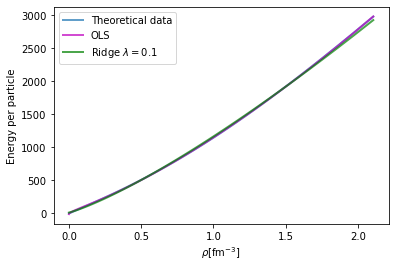

In [9]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops
X = np.zeros((len(Density),4))
X[:,3] = Density**(4.0/3.0)
X[:,2] = Density
X[:,1] = Density**(2.0/3.0)
X[:,0] = 1

# We use now Scikit-Learn's linear regressor and ridge regressor
# OLS part
clf = skl.LinearRegression().fit(X, Energies)
ytilde = clf.predict(X)
EoS['Eols']  = ytilde
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, ytilde))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, ytilde))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, ytilde))
print(clf.coef_, clf.intercept_)

# The Ridge regression with a hyperparameter lambda = 0.1
_lambda = 0.1
clf_ridge = skl.Ridge(alpha=_lambda).fit(X, Energies)
yridge = clf_ridge.predict(X)
EoS['Eridge']  = yridge
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, yridge))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, yridge))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, yridge))
print(clf_ridge.coef_, clf_ridge.intercept_)

fig, ax = plt.subplots()
ax.set_xlabel(r'$\rho[\mathrm{fm}^{-3}]$')
ax.set_ylabel(r'Energy per particle')
ax.plot(EoS['Density'], EoS['Energy'], alpha=0.7, lw=2,
            label='Theoretical data')
ax.plot(EoS['Density'], EoS['Eols'], alpha=0.7, lw=2, c='m',
            label='OLS')
ax.plot(EoS['Density'], EoS['Eridge'], alpha=0.7, lw=2, c='g',
            label='Ridge $\lambda = 0.1$')
ax.legend()
save_fig("EoSfitting")
plt.show()

The above simple polynomial in density $\rho$ gives an excellent fit
to the data. 

We note also that there is a small deviation between the
standard OLS and the Ridge regression at higher densities. We discuss this in more detail
below.


## Splitting our Data in Training and Test data

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (sometimes also an additional
validation set).  **Scikit-Learn** has an own function for this. There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data. We will
postpone a discussion of this splitting to the end of these notes and
our discussion of the so-called **bias-variance** tradeoff. Here we
limit ourselves to repeat the above equation of state fitting example
but now splitting the data into a training set and a test set.

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organized into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops
X = np.zeros((len(Density),5))
X[:,0] = 1
X[:,1] = Density**(2.0/3.0)
X[:,2] = Density
X[:,3] = Density**(4.0/3.0)
X[:,4] = Density**(5.0/3.0)
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, Energies, test_size=0.5)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

Training R2
0.9999855660203318
Training MSE
6.9544863467435345
Test R2
0.9999823980708721
Test MSE
6.925606384101718


/Users/MortenImac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10
/Users/MortenImac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log10


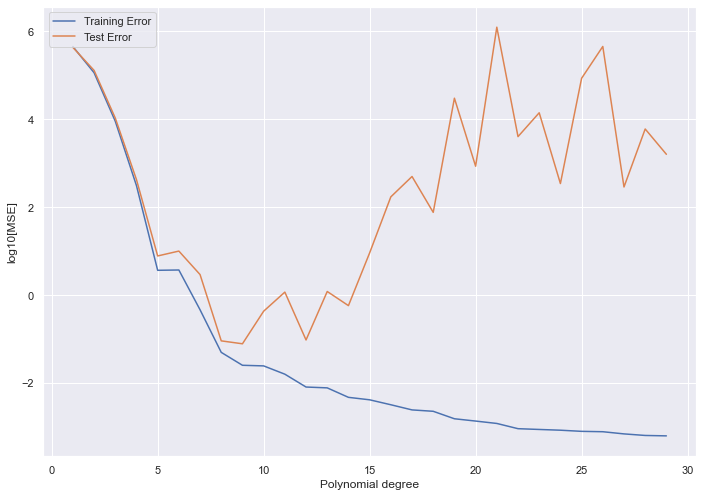

In [23]:
# Common imports                                                                                                                                        
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# Where to save the figures and data files                                                                                                              
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies                                                        
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops                                                                                               

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
trials = 100
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)

# loop over trials in order to estimate the expectation value of the MSE                                                                                
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        x_train, x_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
        model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred)

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
#    print("Degree of polynomial: %3d"% polynomial[polydegree])
#    print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
#    print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()


<!-- !split  -->
## The Boston housing data example

The Boston housing  
data set was originally a part of UCI Machine Learning Repository
and has been removed now. The data set is now included in **Scikit-Learn**'s 
library.  There are 506 samples and 13 feature (predictor) variables
in this data set. The objective is to predict the value of prices of
the house using the features (predictors) listed here.

The features/predictors are
1. CRIM: Per capita crime rate by town

2. ZN: Proportion of residential land zoned for lots over 25000 square feet

3. INDUS: Proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: Nitric oxide concentration (parts per 10 million)

6. RM: Average number of rooms per dwelling

7. AGE: Proportion of owner-occupied units built prior to 1940

8. DIS: Weighted distances to five Boston employment centers

9. RAD: Index of accessibility to radial highways

10. TAX: Full-value property tax rate per USD10000

11. B: $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of [people of African American descent] by town

12. LSTAT: Percentage of lower status of the population

13. MEDV: Median value of owner-occupied homes in USD 1000s

## Housing data, the code
We start by importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

and load the Boston Housing DataSet from **Scikit-Learn**

In [12]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Then we invoke Pandas

In [13]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston['MEDV'] = boston_dataset.target

and preprocess the data

In [14]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We can then visualize the data

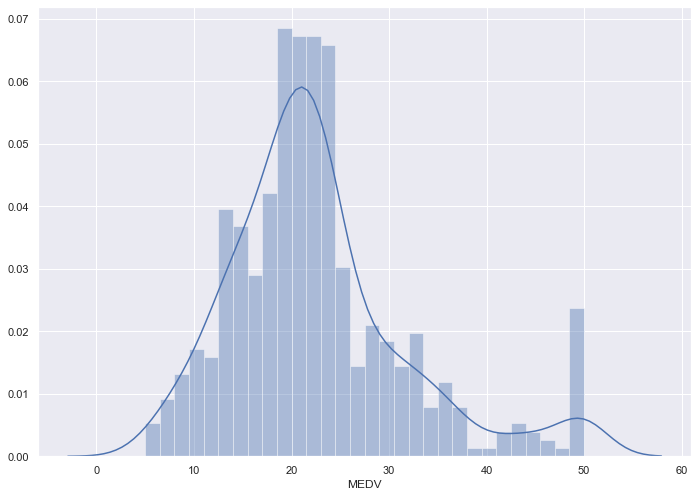

In [15]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

It is now useful to look at the correlation matrix

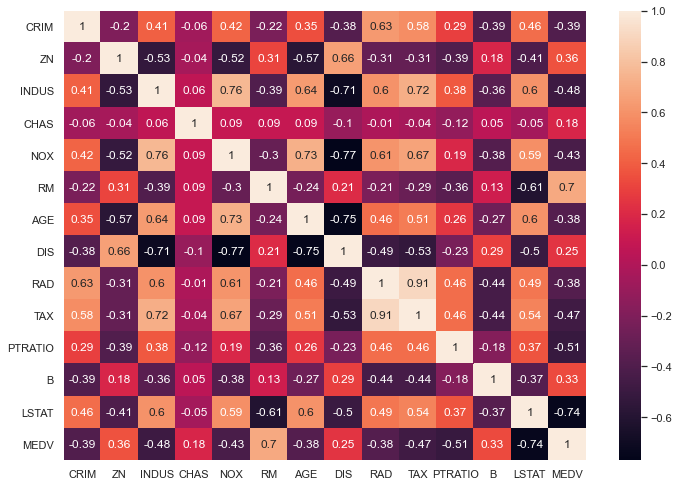

In [16]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT** and  **RM**. We see also that **RAD** and **TAX** are stronly correlated, but we don't include this in our features together to avoid multi-colinearity

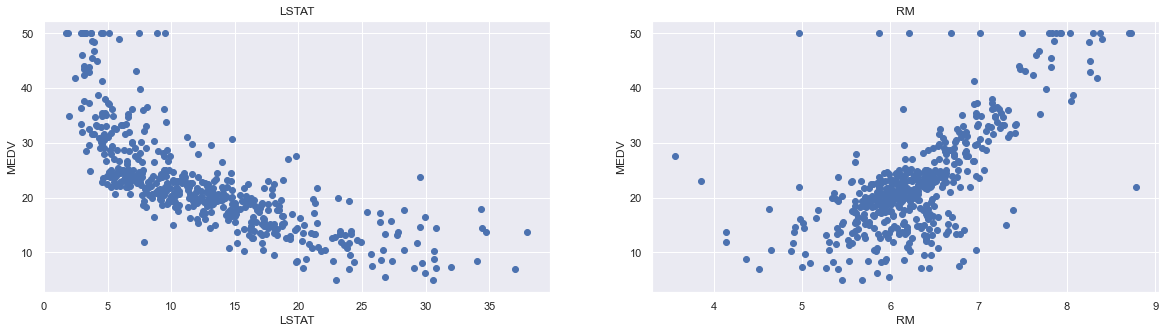

In [17]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Now we start training our model

In [18]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

We split the data into training and test sets

In [19]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Then we use the linear regression functionality from **Scikit-Learn**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


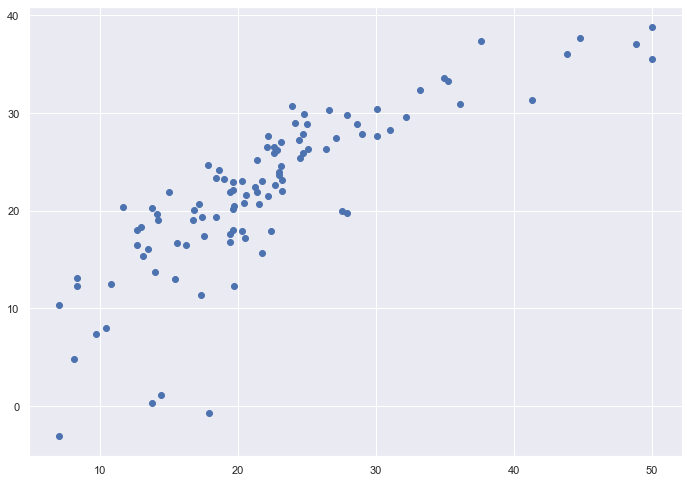

In [21]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

## The singular value decomposition


The examples we have looked at so far are cases where we normally can
invert the matrix $\boldsymbol{X}^T\boldsymbol{X}$. Using a polynomial expansion as we
did both for the masses and the fitting of the equation of state,
leads to row vectors of the design matrix which are essentially
orthogonal due to the polynomial character of our model. Obtaining the inverse of the design matrix is then often done via a so-called LU, QR or Cholesky decomposition. 



This may
however not the be case in general and a standard matrix inversion
algorithm based on say LU, QR or Cholesky decomposition may lead to singularities. We will see examples of this below.

There is however a way to partially circumvent this problem and also gain some insight about the ordinary least squares approach. 

This is given by the **Singular Value Decomposition** algorithm, perhaps
the most powerful linear algebra algorithm.  Let us look at a
different example where we may have problems with the standard matrix
inversion algorithm. Thereafter we dive into the math of the SVD.





## Linear Regression Problems

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We see this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ (the matrix we need to invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.


## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\beta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\beta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\beta_i$ cannot be estimated.

A cheap  *ad hoc* approach is  simply to add a small diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.  When we discuss **Ridge** regression this is actually what we end up evaluating. The parameter $\lambda$ is called a hyperparameter. More about this later. 



## Basic math of the SVD


From standard linear algebra we know that a square matrix $\boldsymbol{X}$ can be diagonalized if and only it is 
a so-called [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix), that is if $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$
we have $\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ or if $\boldsymbol{X}\in {\mathbb{C}}^{n\times n}$ we have $\boldsymbol{X}\boldsymbol{X}^{\dagger}=\boldsymbol{X}^{\dagger}\boldsymbol{X}$.
The matrix has then a set of eigenpairs

$$
(\lambda_1,\boldsymbol{u}_1),\dots, (\lambda_n,\boldsymbol{u}_n),
$$

and the eigenvalues are given by the diagonal matrix

$$
\boldsymbol{\Sigma}=\mathrm{Diag}(\lambda_1, \dots,\lambda_n).
$$

The matrix $\boldsymbol{X}$ can be written in terms of an orthogonal/unitary transformation $\boldsymbol{U}$

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ or $\boldsymbol{U}\boldsymbol{U}^{\dagger}=\boldsymbol{I}$.

Not all square matrices are diagonalizable. A matrix like the one discussed above

$$
\boldsymbol{X} = \begin{bmatrix} 
1&  -1 \\
1& -1\\
\end{bmatrix}
$$

is not diagonalizable, it is a so-called [defective matrix](https://en.wikipedia.org/wiki/Defective_matrix). It is easy to see that the condition
$\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ is not fulfilled. 


## The SVD, a Fantastic Algorithm


However, and this is the strength of the SVD algorithm, any general
matrix $\boldsymbol{X}$ can be decomposed in terms of a diagonal matrix and
two orthogonal/unitary matrices.  The [Singular Value Decompostion
(SVD) theorem](https://en.wikipedia.org/wiki/Singular_value_decomposition)
states that a general $m\times n$ matrix $\boldsymbol{X}$ can be written in
terms of a diagonal matrix $\boldsymbol{\Sigma}$ of dimensionality $n\times n$
and two orthognal matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has
dimensionality $m \times m$ and the last dimensionality $n\times n$.
We have then

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

As an example, the above defective matrix can be decomposed as

$$
\boldsymbol{X} = \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  1 \\ 1& -1\\ \end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 0\\ \end{bmatrix}    \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  -1 \\ 1& 1\\ \end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with eigenvalues $\sigma_1=2$ and $\sigma_2=0$. 
The SVD exits always! 


## Another Example

Consider the following matrix which can be SVD decomposed as

$$
\boldsymbol{X} = \frac{1}{15}\begin{bmatrix} 14 & 2\\ 4 & 22\\ 16 & 13\end{bmatrix}=\frac{1}{3}\begin{bmatrix}  1&  2 & 2 \\ 2& -1 & 1\\ 2 & 1& -2\end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 1\\ 0 & 0\end{bmatrix}\frac{1}{5}\begin{bmatrix}  3&  4 \\ 4& -3\end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

This is a $3\times 2$ matrix which is decomposed in terms of a
$3\times 3$ matrix $\boldsymbol{U}$, and a $2\times 2$ matrix $\boldsymbol{V}$. It is easy to see
that $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal (how?). 

And the SVD
decomposition (singular values) gives eigenvalues 
$\sigma_i\geq\sigma_{i+1}$ for all $i$ and for dimensions larger than $i=2$, the
eigenvalues (singular values) are zero.

In the general case, where our design matrix $\boldsymbol{X}$ has dimension
$n\times p$, the matrix is thus decomposed into an $n\times n$
orthogonal matrix $\boldsymbol{U}$, a $p\times p$ orthogonal matrix $\boldsymbol{V}$
and a diagonal matrix $\boldsymbol{\Sigma}$ with $r=\mathrm{min}(n,p)$
singular values $\sigma_i\geq 0$ on the main diagonal and zeros filling
the rest of the matrix.  There are at most $p$ singular values
assuming that $n > p$. In our regression examples for the nuclear
masses and the equation of state this is indeed the case, while for
the Ising model we have $p > n$. These are often cases that lead to
near singular or singular matrices.

The columns of $\boldsymbol{U}$ are called the left singular vectors while the columns of $\boldsymbol{V}$ are the right singular vectors.

## Economy-size SVD

If we assume that $n > p$, then our matrix $\boldsymbol{U}$ has dimension $n
\times n$. The last $n-p$ columns of $\boldsymbol{U}$ become however
irrelevant in our calculations since they are multiplied with the
zeros in $\boldsymbol{\Sigma}$.

The economy-size decomposition removes extra rows or columns of zeros
from the diagonal matrix of singular values, $\boldsymbol{\Sigma}$, along with the columns
in either $\boldsymbol{U}$ or $\boldsymbol{V}$ that multiply those zeros in the expression. 
Removing these zeros and columns can improve execution time
and reduce storage requirements without compromising the accuracy of
the decomposition.

If $n > p$, we keep only the first $p$ columns of $\boldsymbol{U}$ and $\boldsymbol{\Sigma}$ has dimension $p\times p$. 
If $p > n$, then only the first $n$ columns of $\boldsymbol{V}$ are computed and $\boldsymbol{\Sigma}$ has dimension $n\times n$.
The $n=p$ case is obvious, we retain the full SVD. 
In general the economy-size SVD leads to less FLOPS and still conserving the desired accuracy.

## Mathematical Properties

There are several interesting mathematical properties which will be
relevant when we are going to discuss the differences between say
ordinary least squares (OLS) and **Ridge** regression.

We have from OLS that the parameters of the linear approximation are given by

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The matrix to invert can be rewritten in terms of our SVD decomposition as

$$
\boldsymbol{X}^T\boldsymbol{X} = \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Using the orthogonality properties of $\boldsymbol{U}$ we have

$$
\boldsymbol{X}^T\boldsymbol{X} = \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T =  \boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T,
$$

with $\boldsymbol{D}$ being a diagonal matrix with values along the diagonal given by the singular values squared. 

This means that

$$
(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{V} = \boldsymbol{V}\boldsymbol{D},
$$

that is the eigenvectors of $(\boldsymbol{X}^T\boldsymbol{X})$ are given by the columns of the right singular matrix of $\boldsymbol{X}$ and the eigenvalues are the squared singular values.  It is easy to show (show this) that

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U} = \boldsymbol{U}\boldsymbol{D},
$$

that is, the eigenvectors of $(\boldsymbol{X}\boldsymbol{X})^T$ are the columns of the left singular matrix and the eigenvalues are the same. 

Going back to our OLS equation we have

$$
\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

We will come back to this expression when we discuss Ridge regression. 


## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## More on Ridge Regression

Using the matrix-vector expression for Ridge regression,

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

by taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

We see that Ridge regression is nothing but the standard
OLS with a modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The
consequences, in particular for our discussion of the bias-variance tradeoff 
are rather interesting.

Furthermore, if we use the result above in terms of the SVD decomposition (our analysis was done for the OLS method), we had

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U} = \boldsymbol{U}\boldsymbol{D}.
$$

We can  analyse the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}
$$

For Ridge regression this becomes

$$
\boldsymbol{X}\boldsymbol{\beta}^{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$. 

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom.
Actually, calculating the variance of $\boldsymbol{X}\boldsymbol{v}_j$ shows that this quantity is equal to $\sigma_j^2/n$.
With a parameter $\lambda$ we can thus shrink the role of specific parameters.  


## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Codes for the SVD

In [22]:
import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
#    print('test U')
#    print( (np.transpose(U) @ U - U @np.transpose(U)))
#    print('test VT')
#    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(s)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=s[i]
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))


X = np.array([ [1.0, -1.0, 2.0], [1.0, 0.0, 1.0], [1.0, 2.0, -1.0], [1.0, 1.0, 0.0] ])
print(X)
A = np.transpose(X) @ X
print(A)
# Brute force inversion of super-collinear matrix
#B = np.linalg.inv(A)
#print(B)
C = SVDinv(A)
print(C)

The matrix $\boldsymbol{X}$ has columns that are linearly dependent. The first
column is the row-wise sum of the other two columns. The rank of a
matrix (the column rank) is the dimension of space spanned by the
column vectors. The rank of the matrix is the number of linearly
independent columns, in this case just $2$. We see this from the
singular values when running the above code. Running the standard
inversion algorithm for matrix inversion with $\boldsymbol{X}^T\boldsymbol{X}$ results
in the program terminating due to a singular matrix.


<!-- !split  -->
## A better understanding of regularization

The parameter $\lambda$ that we have introduced in the Ridge (and
Lasso as well) regression is often called a regularization parameter
or shrinkage parameter. It is common to call it a hyperparameter. What does it mean mathemtically?

Here we will first look at how to analyze the difference between the
standard OLS equations and the Ridge expressions in terms of a linear
algebra analysis using the SVD algorithm. Thereafter, we will link
(see the material on the bias-variance tradeoff below) these
observation to the statisical analysis of the results. In particular
we consider how the variance of the parameters $\boldsymbol{\beta}$ is
affected by changing the parameter $\lambda$.

## Decomposing the OLS and Ridge expressions

We have our design matrix
 $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$. With the SVD we decompose it as

$$
\boldsymbol{X} = \boldsymbol{U\Sigma V^T},
$$

with $\boldsymbol{U}\in {\mathbb{R}}^{n\times n}$, $\boldsymbol{\Sigma}\in {\mathbb{R}}^{n\times p}$
and $\boldsymbol{V}\in {\mathbb{R}}^{p\times p}$.

The matrices $\boldsymbol{U}$ and $\boldsymbol{V}$ are unitary/orthonormal matrices, that is in case the matrices are real we have $\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ and $\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{V}\boldsymbol{V}^T=\boldsymbol{I}$.

## Spectral Decomposition of the OLS

More material to be added here

## Where are we going?

Before we proceed, we need to rethink what we have been doing. In our
eager to fit the data, we have omitted several important elements in
our regression analysis. In what follows we will
1. look at statistical properties, including a discussion of mean values, variance and the so-called bias-variance tradeoff

2. introduce resampling techniques like cross-validation, bootstrapping and jackknife and more

This will allow us to link the standard linear algebra methods we have discussed above to a statistical interpretation of the methods. 





## Resampling methods
Resampling methods are an indispensable tool in modern
statistics. They involve repeatedly drawing samples from a training
set and refitting a model of interest on each sample in order to
obtain additional information about the fitted model. For example, in
order to estimate the variability of a linear regression fit, we can
repeatedly draw different samples from the training data, fit a linear
regression to each new sample, and then examine the extent to which
the resulting fits differ. Such an approach may allow us to obtain
information that would not be available from fitting the model only
once using the original training sample.

Two resampling methods are often used in Machine Learning analyses,
1. The **bootstrap method**

2. and **Cross-Validation**

In addition there are several other methods such as the Jackknife and the Blocking methods. We will discuss in particular
cross-validation and the bootstrap method.




## Resampling approaches can be computationally expensive

Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using
different subsets of the training data. However, due to recent
advances in computing power, the computational requirements of
resampling methods generally are not prohibitive. In this chapter, we
discuss two of the most commonly used resampling methods,
cross-validation and the bootstrap. Both methods are important tools
in the practical application of many statistical learning
procedures. For example, cross-validation can be used to estimate the
test error associated with a given statistical learning method in
order to evaluate its performance, or to select the appropriate level
of flexibility. The process of evaluating a model’s performance is
known as model assessment, whereas the process of selecting the proper
level of flexibility for a model is known as model selection. The
bootstrap is widely used.



## Why resampling methods ?
**Statistical analysis.**


* Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods

* The results can be analysed with the same statistical tools as we would use analysing experimental data.

* As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

    

## Statistical analysis

* As in other experiments, many numerical  experiments have two classes of errors:

  * Statistical errors

  * Systematical errors


* Statistical errors can be estimated using standard tools from statistics

* Systematical errors are method specific and must be treated differently from case to case.

    



## Statistics
The *probability distribution function (PDF)* is a function
$p(x)$ on the domain which, in the discrete case, gives us the
probability or relative frequency with which these values of $X$ occur:

$$
p(x) = \mathrm{prob}(X=x)
$$

In the continuous case, the PDF does not directly depict the
actual probability. Instead we define the probability for the
stochastic variable to assume any value on an infinitesimal interval
around $x$ to be $p(x)dx$. The continuous function $p(x)$ then gives us
the *density* of the probability rather than the probability
itself. The probability for a stochastic variable to assume any value
on a non-infinitesimal interval $[a,\,b]$ is then just the integral:

$$
\mathrm{prob}(a\leq X\leq b) = \int_a^b p(x)dx
$$

Qualitatively speaking, a stochastic variable represents the values of
numbers chosen as if by chance from some specified PDF so that the
selection of a large set of these numbers reproduces this PDF.




## Statistics, moments
A particularly useful class of special expectation values are the
*moments*. The $n$-th moment of the PDF $p$ is defined as
follows:

$$
\langle x^n\rangle \equiv \int\! x^n p(x)\,dx
$$

The zero-th moment $\langle 1\rangle$ is just the normalization condition of
$p$. The first moment, $\langle x\rangle$, is called the *mean* of $p$
and often denoted by the letter $\mu$:

$$
\langle x\rangle = \mu \equiv \int\! x p(x)\,dx
$$

## Statistics, central moments
A special version of the moments is the set of *central moments*,
the n-th central moment defined as:

$$
\langle (x-\langle x \rangle )^n\rangle \equiv \int\! (x-\langle x\rangle)^n p(x)\,dx
$$

The zero-th and first central moments are both trivial, equal $1$ and
$0$, respectively. But the second central moment, known as the
*variance* of $p$, is of particular interest. For the stochastic
variable $X$, the variance is denoted as $\sigma^2_X$ or $\mathrm{var}(X)$:

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\sigma^2_X\ \ =\ \ \mathrm{var}(X)  =  \langle (x-\langle x\rangle)^2\rangle =
\int\! (x-\langle x\rangle)^2 p(x)\,dx
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} 
 =  \int\! \left(x^2 - 2 x \langle x\rangle^{2} +
  \langle x\rangle^2\right)p(x)\,dx
\label{_auto3} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
 =  \langle x^2\rangle - 2 \langle x\rangle\langle x\rangle + \langle x\rangle^2
\label{_auto4} \tag{4}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation} 
 =  \langle x^2\rangle - \langle x\rangle^2
\label{_auto5} \tag{5}
\end{equation}
$$

The square root of the variance, $\sigma =\sqrt{\langle (x-\langle x\rangle)^2\rangle}$ is called the *standard deviation* of $p$. It is clearly just the RMS (root-mean-square)
value of the deviation of the PDF from its mean value, interpreted
qualitatively as the *spread* of $p$ around its mean.



## Statistics, covariance
Another important quantity is the so called covariance, a variant of
the above defined variance. Consider again the set $\{X_i\}$ of $n$
stochastic variables (not necessarily uncorrelated) with the
multivariate PDF $P(x_1,\dots,x_n)$. The *covariance* of two
of the stochastic variables, $X_i$ and $X_j$, is defined as follows:

$$
\mathrm{cov}(X_i,\,X_j) \equiv \langle (x_i-\langle x_i\rangle)(x_j-\langle x_j\rangle)\rangle
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:def_covariance"></div>

$$
\begin{equation} 
=
\int\!\cdots\!\int\!(x_i-\langle x_i \rangle)(x_j-\langle x_j \rangle)\,
P(x_1,\dots,x_n)\,dx_1\dots dx_n
\label{eq:def_covariance} \tag{6}
\end{equation}
$$

with

$$
\langle x_i\rangle =
\int\!\cdots\!\int\!x_i\,P(x_1,\dots,x_n)\,dx_1\dots dx_n
$$

## Statistics, more covariance
If we consider the above covariance as a matrix $C_{ij}=\mathrm{cov}(X_i,\,X_j)$, then the diagonal elements are just the familiar
variances, $C_{ii} = \mathrm{cov}(X_i,\,X_i) = \mathrm{var}(X_i)$. It turns out that
all the off-diagonal elements are zero if the stochastic variables are
uncorrelated. This is easy to show, keeping in mind the linearity of
the expectation value. Consider the stochastic variables $X_i$ and
$X_j$, ($i\neq j$):

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\mathrm{cov}(X_i,\,X_j) = \langle(x_i-\langle x_i\rangle)(x_j-\langle x_j\rangle)\rangle
\label{_auto6} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation} 
=\langle x_i x_j - x_i\langle x_j\rangle - \langle x_i\rangle x_j + \langle x_i\rangle\langle x_j\rangle\rangle 
\label{_auto7} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation} 
=\langle x_i x_j\rangle - \langle x_i\langle x_j\rangle\rangle - \langle \langle x_i\rangle x_j\rangle +
\langle \langle x_i\rangle\langle x_j\rangle\rangle
\label{_auto8} \tag{9}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation} 
=\langle x_i x_j\rangle - \langle x_i\rangle\langle x_j\rangle - \langle x_i\rangle\langle x_j\rangle +
\langle x_i\rangle\langle x_j\rangle
\label{_auto9} \tag{10}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation} 
=\langle x_i x_j\rangle - \langle x_i\rangle\langle x_j\rangle
\label{_auto10} \tag{11}
\end{equation}
$$

## Covariance example

Suppose we have defined three vectors $\hat{x}, \hat{y}, \hat{z}$ with
$n$ elements each. The covariance matrix is defined as

$$
\hat{\Sigma} = \begin{bmatrix} \sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
                              \sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
                              \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
             \end{bmatrix},
$$

where for example

$$
\sigma_{xy} =\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})(y_i- \overline{y}).
$$

The Numpy function **np.cov** calculates the covariance elements using
the factor $1/(n-1)$ instead of $1/n$ since it assumes we do not have
the exact mean valu\ es.

The following simple function uses the **np.vstack** function which
takes each vector of dimension $1\times n$ and produces a $3\times n$
matrix $\hat{W}$

$$
\hat{W} = \begin{bmatrix} x_0 & y_0 & z_0 \\
                          x_1 & y_1 & z_1 \\
                          x_2 & y_2 & z_2 \\
                          \dots & \dots & \dots \\
                          x_{n-2} & y_{n-2} & z_{n-2} \\
                          x_{n-1} & y_{n-1} & z_{n-1}
             \end{bmatrix},
$$

which in turn is converted into into the $3\times 3$ covariance matrix
$\hat{\Sigma}$ via the Numpy function **np.cov()**. We note that we can
also calculate the mean value of each set of samples $\hat{x}$ etc
using the Numpy function **np.mean(x)**. We can also extract the
eigenvalues of the covariance matrix through the **np.linalg.eig()**
function.


## Covariance in numpy

In [23]:
# Importing various packages
import numpy as np

n = 100
x = np.random.normal(size=n)
print(np.mean(x))
y = 4+3*x+np.random.normal(size=n)
print(np.mean(y))
z = x**3+np.random.normal(size=n)
print(np.mean(z))
W = np.vstack((x, y, z))
Sigma = np.cov(W)
print(Sigma)
Eigvals, Eigvecs = np.linalg.eig(Sigma)
print(Eigvals)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
eye = np.eye(4)
print(eye)
sparse_mtx = sparse.csr_matrix(eye)
print(sparse_mtx)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker='x')
plt.show()

## Statistics, independent variables
If $X_i$ and $X_j$ are independent, we get 
$\langle x_i x_j\rangle =\langle x_i\rangle\langle x_j\rangle$, resulting in $\mathrm{cov}(X_i, X_j) = 0\ \ (i\neq j)$.

Also useful for us is the covariance of linear combinations of
stochastic variables. Let $\{X_i\}$ and $\{Y_i\}$ be two sets of
stochastic variables. Let also $\{a_i\}$ and $\{b_i\}$ be two sets of
scalars. Consider the linear combination:

$$
U = \sum_i a_i X_i \qquad V = \sum_j b_j Y_j
$$

By the linearity of the expectation value

$$
\mathrm{cov}(U, V) = \sum_{i,j}a_i b_j \mathrm{cov}(X_i, Y_j)
$$

## Statistics, more variance
Now, since the variance is just $\mathrm{var}(X_i) = \mathrm{cov}(X_i, X_i)$, we get
the variance of the linear combination $U = \sum_i a_i X_i$:

<!-- Equation labels as ordinary links -->
<div id="eq:variance_linear_combination"></div>

$$
\begin{equation}
\mathrm{var}(U) = \sum_{i,j}a_i a_j \mathrm{cov}(X_i, X_j)
\label{eq:variance_linear_combination} \tag{12}
\end{equation}
$$

And in the special case when the stochastic variables are
uncorrelated, the off-diagonal elements of the covariance are as we
know zero, resulting in:

1
1
3
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\mathrm{var}(\sum_i a_i X_i) = \sum_i a_i^2 \mathrm{var}(X_i)
$$

which will become very useful in our study of the error in the mean
value of a set of measurements.



## Statistics and stochastic processes
A *stochastic process* is a process that produces sequentially a
chain of values:

$$
\{x_1, x_2,\dots\,x_k,\dots\}.
$$

We will call these
values our *measurements* and the entire set as our measured
*sample*.  The action of measuring all the elements of a sample
we will call a stochastic *experiment* since, operationally,
they are often associated with results of empirical observation of
some physical or mathematical phenomena; precisely an experiment. We
assume that these values are distributed according to some 
PDF $p_X^{\phantom X}(x)$, where $X$ is just the formal symbol for the
stochastic variable whose PDF is $p_X^{\phantom X}(x)$. Instead of
trying to determine the full distribution $p$ we are often only
interested in finding the few lowest moments, like the mean
$\mu_X^{\phantom X}$ and the variance $\sigma_X^{\phantom X}$.




<!-- !split  -->
## Statistics and sample variables
In practical situations a sample is always of finite size. Let that
size be $n$. The expectation value of a sample, the *sample mean*, is then defined as follows:

$$
\bar{x}_n \equiv \frac{1}{n}\sum_{k=1}^n x_k
$$

The *sample variance* is:

$$
\mathrm{var}(x) \equiv \frac{1}{n}\sum_{k=1}^n (x_k - \bar{x}_n)^2
$$

its square root being the *standard deviation of the sample*. The
*sample covariance* is:

$$
\mathrm{cov}(x)\equiv\frac{1}{n}\sum_{kl}(x_k - \bar{x}_n)(x_l - \bar{x}_n)
$$

## Statistics, sample variance and covariance
Note that the sample variance is the sample covariance without the
cross terms. In a similar manner as the covariance in Eq. ([6](#eq:def_covariance)) is a measure of the correlation between
two stochastic variables, the above defined sample covariance is a
measure of the sequential correlation between succeeding measurements
of a sample.

These quantities, being known experimental values, differ
significantly from and must not be confused with the similarly named
quantities for stochastic variables, mean $\mu_X$, variance $\mathrm{var}(X)$
and covariance $\mathrm{cov}(X,Y)$.



## Statistics, law of large numbers
The law of large numbers
states that as the size of our sample grows to infinity, the sample
mean approaches the true mean $\mu_X^{\phantom X}$ of the chosen PDF:

$$
\lim_{n\to\infty}\bar{x}_n = \mu_X^{\phantom X}
$$

The sample mean $\bar{x}_n$ works therefore as an estimate of the true
mean $\mu_X^{\phantom X}$.

What we need to find out is how good an approximation $\bar{x}_n$ is to
$\mu_X^{\phantom X}$. In any stochastic measurement, an estimated
mean is of no use to us without a measure of its error. A quantity
that tells us how well we can reproduce it in another experiment. We
are therefore interested in the PDF of the sample mean itself. Its
standard deviation will be a measure of the spread of sample means,
and we will simply call it the *error* of the sample mean, or
just sample error, and denote it by $\mathrm{err}_X^{\phantom X}$. In
practice, we will only be able to produce an *estimate* of the
sample error since the exact value would require the knowledge of the
true PDFs behind, which we usually do not have.




## Statistics, more on sample error
Let us first take a look at what happens to the sample error as the
size of the sample grows. In a sample, each of the measurements $x_i$
can be associated with its own stochastic variable $X_i$. The
stochastic variable $\overline X_n$ for the sample mean $\bar{x}_n$ is
then just a linear combination, already familiar to us:

$$
\overline X_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

All the coefficients are just equal $1/n$. The PDF of $\overline X_n$,
denoted by $p_{\overline X_n}(x)$ is the desired PDF of the sample
means.



## Statistics
The probability density of obtaining a sample mean $\bar x_n$
is the product of probabilities of obtaining arbitrary values $x_1,
x_2,\dots,x_n$ with the constraint that the mean of the set $\{x_i\}$
is $\bar x_n$:

$$
p_{\overline X_n}(x) = \int p_X^{\phantom X}(x_1)\cdots
\int p_X^{\phantom X}(x_n)\ 
\delta\!\left(x - \frac{x_1+x_2+\dots+x_n}{n}\right)dx_n \cdots dx_1
$$

And in particular we are interested in its variance $\mathrm{var}(\overline X_n)$.





## Statistics, central limit theorem
It is generally not possible to express $p_{\overline X_n}(x)$ in a
closed form given an arbitrary PDF $p_X^{\phantom X}$ and a number
$n$. But for the limit $n\to\infty$ it is possible to make an
approximation. The very important result is called *the central limit theorem*. It tells us that as $n$ goes to infinity,
$p_{\overline X_n}(x)$ approaches a Gaussian distribution whose mean
and variance equal the true mean and variance, $\mu_{X}^{\phantom X}$
and $\sigma_{X}^{2}$, respectively:

<!-- Equation labels as ordinary links -->
<div id="eq:central_limit_gaussian"></div>

$$
\begin{equation}
\lim_{n\to\infty} p_{\overline X_n}(x) =
\left(\frac{n}{2\pi\mathrm{var}(X)}\right)^{1/2}
e^{-\frac{n(x-\bar x_n)^2}{2\mathrm{var}(X)}}
\label{eq:central_limit_gaussian} \tag{13}
\end{equation}
$$

## Statistics, more technicalities
The desired variance
$\mathrm{var}(\overline X_n)$, i.e. the sample error squared
$\mathrm{err}_X^2$, is given by:

<!-- Equation labels as ordinary links -->
<div id="eq:error_exact"></div>

$$
\begin{equation}
\mathrm{err}_X^2 = \mathrm{var}(\overline X_n) = \frac{1}{n^2}
\sum_{ij} \mathrm{cov}(X_i, X_j)
\label{eq:error_exact} \tag{14}
\end{equation}
$$

We see now that in order to calculate the exact error of the sample
with the above expression, we would need the true means
$\mu_{X_i}^{\phantom X}$ of the stochastic variables $X_i$. To
calculate these requires that we know the true multivariate PDF of all
the $X_i$. But this PDF is unknown to us, we have only got the measurements of
one sample. The best we can do is to let the sample itself be an
estimate of the PDF of each of the $X_i$, estimating all properties of
$X_i$ through the measurements of the sample.




## Statistics
Our estimate of $\mu_{X_i}^{\phantom X}$ is then the sample mean $\bar x$
itself, in accordance with the the central limit theorem:

$$
\mu_{X_i}^{\phantom X} = \langle x_i\rangle \approx \frac{1}{n}\sum_{k=1}^n x_k = \bar x
$$

Using $\bar x$ in place of $\mu_{X_i}^{\phantom X}$ we can give an
*estimate* of the covariance in Eq. ([14](#eq:error_exact))

$$
\mathrm{cov}(X_i, X_j) = \langle (x_i-\langle x_i\rangle)(x_j-\langle x_j\rangle)\rangle
\approx\langle (x_i - \bar x)(x_j - \bar{x})\rangle,
$$

resulting in

$$
\frac{1}{n} \sum_{l}^n \left(\frac{1}{n}\sum_{k}^n (x_k -\bar x_n)(x_l - \bar x_n)\right)=\frac{1}{n}\frac{1}{n} \sum_{kl} (x_k -\bar x_n)(x_l - \bar x_n)=\frac{1}{n}\mathrm{cov}(x)
$$

## Statistics and sample variance
By the same procedure we can use the sample variance as an
estimate of the variance of any of the stochastic variables $X_i$

$$
\mathrm{var}(X_i)=\langle x_i - \langle x_i\rangle\rangle \approx \langle x_i - \bar x_n\rangle\nonumber,
$$

which is approximated as

<!-- Equation labels as ordinary links -->
<div id="eq:var_estimate_i_think"></div>

$$
\begin{equation}
\mathrm{var}(X_i)\approx \frac{1}{n}\sum_{k=1}^n (x_k - \bar x_n)=\mathrm{var}(x)
\label{eq:var_estimate_i_think} \tag{15}
\end{equation}
$$

Now we can calculate an estimate of the error
$\mathrm{err}_X^{\phantom X}$ of the sample mean $\bar x_n$:

$$
\mathrm{err}_X^2
=\frac{1}{n^2}\sum_{ij} \mathrm{cov}(X_i, X_j) \nonumber
$$

$$
\approx\frac{1}{n^2}\sum_{ij}\frac{1}{n}\mathrm{cov}(x) =\frac{1}{n^2}n^2\frac{1}{n}\mathrm{cov}(x)\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate"></div>

$$
\begin{equation} 
=\frac{1}{n}\mathrm{cov}(x)
\label{eq:error_estimate} \tag{16}
\end{equation}
$$

which is nothing but the sample covariance divided by the number of
measurements in the sample.



## Statistics, uncorrelated results

In the special case that the measurements of the sample are
uncorrelated (equivalently the stochastic variables $X_i$ are
uncorrelated) we have that the off-diagonal elements of the covariance
are zero. This gives the following estimate of the sample error:

$$
\mathrm{err}_X^2=\frac{1}{n^2}\sum_{ij} \mathrm{cov}(X_i, X_j) =
\frac{1}{n^2} \sum_i \mathrm{var}(X_i),
$$

resulting in

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate_uncorrel"></div>

$$
\begin{equation}
\mathrm{err}_X^2\approx \frac{1}{n^2} \sum_i \mathrm{var}(x)= \frac{1}{n}\mathrm{var}(x)
\label{eq:error_estimate_uncorrel} \tag{17}
\end{equation}
$$

where in the second step we have used Eq. ([15](#eq:var_estimate_i_think)).
The error of the sample is then just its standard deviation divided by
the square root of the number of measurements the sample contains.
This is a very useful formula which is easy to compute. It acts as a
first approximation to the error, but in numerical experiments, we
cannot overlook the always present correlations.



## Statistics, computations
For computational purposes one usually splits up the estimate of
$\mathrm{err}_X^2$, given by Eq. ([16](#eq:error_estimate)), into two
parts

$$
\mathrm{err}_X^2 = \frac{1}{n}\mathrm{var}(x) + \frac{1}{n}(\mathrm{cov}(x)-\mathrm{var}(x)),
$$

which equals

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate_split_up"></div>

$$
\begin{equation}
\frac{1}{n^2}\sum_{k=1}^n (x_k - \bar x_n)^2 +\frac{2}{n^2}\sum_{k<l} (x_k - \bar x_n)(x_l - \bar x_n)
\label{eq:error_estimate_split_up} \tag{18}
\end{equation}
$$

The first term is the same as the error in the uncorrelated case,
Eq. ([17](#eq:error_estimate_uncorrel)). This means that the second
term accounts for the error correction due to correlation between the
measurements. For uncorrelated measurements this second term is zero.



## Statistics, more on computations of errors
Computationally the uncorrelated first term is much easier to treat
efficiently than the second.

$$
\mathrm{var}(x) = \frac{1}{n}\sum_{k=1}^n (x_k - \bar x_n)^2 =
\left(\frac{1}{n}\sum_{k=1}^n x_k^2\right) - \bar x_n^2
$$

We just accumulate separately the values $x^2$ and $x$ for every
measurement $x$ we receive. The correlation term, though, has to be
calculated at the end of the experiment since we need all the
measurements to calculate the cross terms. Therefore, all measurements
have to be stored throughout the experiment.






## Statistics, wrapping up 1
Let us analyze the problem by splitting up the correlation term into
partial sums of the form:

$$
f_d = \frac{1}{n-d}\sum_{k=1}^{n-d}(x_k - \bar x_n)(x_{k+d} - \bar x_n)
$$

The correlation term of the error can now be rewritten in terms of
$f_d$

$$
\frac{2}{n}\sum_{k<l} (x_k - \bar x_n)(x_l - \bar x_n) =
2\sum_{d=1}^{n-1} f_d
$$

The value of $f_d$ reflects the correlation between measurements
separated by the distance $d$ in the sample samples.  Notice that for
$d=0$, $f$ is just the sample variance, $\mathrm{var}(x)$. If we divide $f_d$
by $\mathrm{var}(x)$, we arrive at the so called *autocorrelation function*

$$
\kappa_d = \frac{f_d}{\mathrm{var}(x)}
$$

which gives us a useful measure of pairwise correlations
starting always at $1$ for $d=0$.




## Statistics, final expression
The sample error (see eq. ([18](#eq:error_estimate_split_up))) can now be
written in terms of the autocorrelation function:

$$
\mathrm{err}_X^2 =
\frac{1}{n}\mathrm{var}(x)+\frac{2}{n}\cdot\mathrm{var}(x)\sum_{d=1}^{n-1}
\frac{f_d}{\mathrm{var}(x)}\nonumber
$$

$$
=
\left(1+2\sum_{d=1}^{n-1}\kappa_d\right)\frac{1}{n}\mathrm{var}(x)\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate_corr_time"></div>

$$
\begin{equation} 
=\frac{\tau}{n}\cdot\mathrm{var}(x)
\label{eq:error_estimate_corr_time} \tag{19}
\end{equation}
$$

and we see that $\mathrm{err}_X$ can be expressed in terms the
uncorrelated sample variance times a correction factor $\tau$ which
accounts for the correlation between measurements. We call this
correction factor the *autocorrelation time*:

<!-- Equation labels as ordinary links -->
<div id="eq:autocorrelation_time"></div>

$$
\begin{equation}
\tau = 1+2\sum_{d=1}^{n-1}\kappa_d
\label{eq:autocorrelation_time} \tag{20}
\end{equation}
$$

## Statistics, effective number of correlations
For a correlation free experiment, $\tau$
equals 1. From the point of view of
eq. ([19](#eq:error_estimate_corr_time)) we can interpret a sequential
correlation as an effective reduction of the number of measurements by
a factor $\tau$. The effective number of measurements becomes:

$$
n_\mathrm{eff} = \frac{n}{\tau}
$$

To neglect the autocorrelation time $\tau$ will always cause our
simple uncorrelated estimate of $\mathrm{err}_X^2\approx \mathrm{var}(x)/n$ to
be less than the true sample error. The estimate of the error will be
too *good*. On the other hand, the calculation of the full
autocorrelation time poses an efficiency problem if the set of
measurements is very large.





<!-- !split  -->
## Linking the regression analysis with a statistical interpretation

Finally, we are going to discuss several statistical properties which can be obtained in terms of analytical expressions. 
The
advantage of doing linear regression is that we actually end up with
analytical expressions for several statistical quantities.  
Standard least squares and Ridge regression  allow us to
derive quantities like the variance and other expectation values in a
rather straightforward way.


It is assumed that $\varepsilon_i
\sim \mathcal{N}(0, \sigma^2)$ and the $\varepsilon_{i}$ are
independent, i.e.:

$$
\begin{align*} 
\mbox{Cov}(\varepsilon_{i_1},
\varepsilon_{i_2}) & = \left\{ \begin{array}{lcc} \sigma^2 & \mbox{if}
& i_1 = i_2, \\ 0 & \mbox{if} & i_1 \not= i_2.  \end{array} \right.
\end{align*}
$$

The randomness of $\varepsilon_i$ implies that
$\mathbf{y}_i$ is also a random variable. In particular,
$\mathbf{y}_i$ is normally distributed, because $\varepsilon_i \sim
\mathcal{N}(0, \sigma^2)$ and $\mathbf{X}_{i,\ast} \, \boldsymbol{\beta}$ is a
non-random scalar. To specify the parameters of the distribution of
$\mathbf{y}_i$ we need to calculate its first two moments. 

Recall that $\boldsymbol{X}$ is a matrix of dimensionality $n\times p$. The
notation above $\mathbf{X}_{i,\ast}$ means that we are looking at the
row number $i$ and perform a sum over all values $p$.


## Assumptions made

The assumption we have made here can be summarized as (and this is going to be useful when we discuss the bias-variance trade off)
that there exists a function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim \mathcal{N}(0, \sigma^2)$
which describe our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We approximate this function with our model from the solution of the linear regression equations, that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we want to minimize $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, our MSE, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}.
$$

## Expectation value and variance

We can calculate the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\begin{align*} 
\mathbb{E}(y_i) & =
\mathbb{E}(\mathbf{X}_{i, \ast} \, \boldsymbol{\beta}) + \mathbb{E}(\varepsilon_i)
\, \, \, = \, \, \, \mathbf{X}_{i, \ast} \, \beta, 
\end{align*}
$$

while
its variance is

$$
\begin{align*} \mbox{Var}(y_i) & = \mathbb{E} \{ [y_i
- \mathbb{E}(y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( y_i^2 ) -
[\mathbb{E}(y_i)]^2  \\  & = \mathbb{E} [ ( \mathbf{X}_{i, \ast} \,
\beta + \varepsilon_i )^2] - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 \\ &
= \mathbb{E} [ ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2 \varepsilon_i
\mathbf{X}_{i, \ast} \, \boldsymbol{\beta} + \varepsilon_i^2 ] - ( \mathbf{X}_{i,
\ast} \, \beta)^2 \\  & = ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2
\mathbb{E}(\varepsilon_i) \mathbf{X}_{i, \ast} \, \boldsymbol{\beta} +
\mathbb{E}(\varepsilon_i^2 ) - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 
\\ & = \mathbb{E}(\varepsilon_i^2 ) \, \, \, = \, \, \,
\mbox{Var}(\varepsilon_i) \, \, \, = \, \, \, \sigma^2.  
\end{align*}
$$

Hence, $y_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$ (not be confused with the singular values of the SVD). 

## Expectation value and variance for $\boldsymbol{\beta}$

With the OLS expressions for the parameters $\boldsymbol{\beta}$ we can evaluate the expectation value

$$
\mathbb{E}(\boldsymbol{\beta}) = \mathbb{E}[ (\mathbf{X}^{\top} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbb{E}[ \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{X}\boldsymbol{\beta}=\boldsymbol{\beta}.
$$

This means that the estimator of the regression parameters is unbiased.

We can also calculate the variance

The variance of $\boldsymbol{\beta}$ is

$$
\begin{eqnarray*}
\mbox{Var}(\boldsymbol{\beta}) & = & \mathbb{E} \{ [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})] [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})]^{T} \}
\\
& = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}]^{T} \}
\\
% & = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}]^{T} \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & \mathbb{E} \{ (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} \, \mathbf{Y}^{T} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1}  \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \mathbb{E} \{ \mathbf{Y} \, \mathbf{Y}^{T} \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \{ \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \,  \mathbf{X}^{T} + \sigma^2 \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T \, \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^T \,  \mathbf{X}^T \, \mathbf{X} \, (\mathbf{X}^T % \mathbf{X})^{-1}
% \\
% & & + \, \, \sigma^2 \, (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T  \, \mathbf{X} \, (\mathbf{X}^T \mathbf{X})^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^T
\\
& = & \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}  + \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\, \, \, = \, \, \, \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1},
\end{eqnarray*}
$$

where we have used  that $\mathbb{E} (\mathbf{Y} \mathbf{Y}^{T}) =
\mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \, \mathbf{X}^{T} +
\sigma^2 \, \mathbf{I}_{nn}$. From $\mbox{Var}(\boldsymbol{\beta}) = \sigma^2
\, (\mathbf{X}^{T} \mathbf{X})^{-1}$, one obtains an estimate of the
variance of the estimate of the $j$-th regression coefficient:
$\hat{\sigma}^2 (\hat{\beta}_j ) = \hat{\sigma}^2 \sqrt{
[(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} }$. This may be used to
construct a confidence interval for the estimates.


In a similar way, we can obtain analytical expressions for say the
expectation values of the parameters $\boldsymbol{\beta}$ and their variance
when we employ Ridge regression, allowing us again to define a confidence interval. 

It is rather straightforward to show that

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}^{\mathrm{OLS}}.
$$

We see clearly that 
$\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] \not= \boldsymbol{\beta}^{\mathrm{OLS}}$ for any $\lambda > 0$. We say then that the ridge estimator is biased.

We can also compute the variance as

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T} \mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T},
$$

and it is easy to see that if the parameter $\lambda$ goes to infinity then the variance of Ridge parameters $\boldsymbol{\beta}$ goes to zero. 

With this, we can compute the difference

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{OLS}}]-\mbox{Var}(\boldsymbol{\beta}^{\mathrm{Ridge}})=\sigma^2 [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}[ 2\lambda\mathbf{I} + \lambda^2 (\mathbf{X}^{T} \mathbf{X})^{-1} ] \{ [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}.
$$

The difference is non-negative definite since each component of the
matrix product is non-negative definite. 
This means the variance we obtain with the standard OLS will always for $\lambda > 0$ be larger than the variance of $\boldsymbol{\beta}$ obtained with the Ridge estimator. This has interesting consequences when we discuss the so-called bias-variance trade-off below. 


## Resampling methods

With all these analytical equations for both the OLS and Ridge
regression, we will now outline how to assess a given model. This will
lead us to a discussion of the so-called bias-variance tradeoff (see
below) and so-called resampling methods.

One of the quantities we have discussed as a way to measure errors is
the mean-squared error (MSE), mainly used for fitting of continuous
functions. Another choice is the absolute error.

In the discussions below we will focus on the MSE and in particular since we will split the data into test and training data,
we discuss the
1. prediction error or simply the **test error** $\mathrm{Err_{Test}}$, where we have a fixed training set and the test error is the MSE arising from the data reserved for testing. We discuss also the 

2. training error $\mathrm{Err_{Train}}$, which is the average loss over the training data.

As our model becomes more and more complex, more of the training data tends to  used. The training may thence adapt to more complicated structures in the data. This may lead to a decrease in the bias (see below for code example) and a slight increase of the variance for the test error.
For a certain level of complexity the test error will reach minimum, before starting to increase again. The
training error reaches a saturation.




## Resampling methods: Jackknife and Bootstrap

Two famous
resampling methods are the **independent bootstrap** and **the jackknife**. 

The jackknife is a special case of the independent bootstrap. Still, the jackknife was made
popular prior to the independent bootstrap. And as the popularity of
the independent bootstrap soared, new variants, such as **the dependent bootstrap**.

The Jackknife and independent bootstrap work for
independent, identically distributed random variables.
If these conditions are not
satisfied, the methods will fail.  Yet, it should be said that if the data are
independent, identically distributed, and we only want to estimate the
variance of $\overline{X}$ (which often is the case), then there is no
need for bootstrapping. 

## Resampling methods: Jackknife

The Jackknife works by making many replicas of the estimator $\widehat{\theta}$. 
The jackknife is a resampling method where we systematically leave out one observation from the vector of observed values $\boldsymbol{x} = (x_1,x_2,\cdots,X_n)$. 
Let $\boldsymbol{x}_i$ denote the vector

$$
\boldsymbol{x}_i = (x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_n),
$$

which equals the vector $\boldsymbol{x}$ with the exception that observation
number $i$ is left out. Using this notation, define
$\widehat{\theta}_i$ to be the estimator
$\widehat{\theta}$ computed using $\vec{X}_i$. 


## Jackknife code example

In [25]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

## Resampling methods: Bootstrap
Bootstrapping is a nonparametric approach to statistical inference
that substitutes computation for more traditional distributional
assumptions and asymptotic results. Bootstrapping offers a number of
advantages: 
1. The bootstrap is quite general, although there are some cases in which it fails.  

2. Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data are not well behaved or when the sample size is small.  

3. It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically. 

4. It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples).




## Resampling methods: Bootstrap background

Since $\widehat{\theta} = \widehat{\theta}(\boldsymbol{X})$ is a function of random variables,
$\widehat{\theta}$ itself must be a random variable. Thus it has
a pdf, call this function $p(\boldsymbol{t})$. The aim of the bootstrap is to
estimate $p(\boldsymbol{t})$ by the relative frequency of
$\widehat{\theta}$. You can think of this as using a histogram
in the place of $p(\boldsymbol{t})$. If the relative frequency closely
resembles $p(\vec{t})$, then using numerics, it is straight forward to
estimate all the interesting parameters of $p(\boldsymbol{t})$ using point
estimators.  


## Resampling methods: More Bootstrap background

In the case that $\widehat{\theta}$ has
more than one component, and the components are independent, we use the
same estimator on each component separately.  If the probability
density function of $X_i$, $p(x)$, had been known, then it would have
been straight forward to do this by: 
1. Drawing lots of numbers from $p(x)$, suppose we call one such set of numbers $(X_1^*, X_2^*, \cdots, X_n^*)$. 

2. Then using these numbers, we could compute a replica of $\widehat{\theta}$ called $\widehat{\theta}^*$. 

By repeated use of (1) and (2), many
estimates of $\widehat{\theta}$ could have been obtained. The
idea is to use the relative frequency of $\widehat{\theta}^*$
(think of a histogram) as an estimate of $p(\boldsymbol{t})$.

## Resampling methods: Bootstrap approach

But
unless there is enough information available about the process that
generated $X_1,X_2,\cdots,X_n$, $p(x)$ is in general
unknown. Therefore, [Efron in 1979](https://projecteuclid.org/euclid.aos/1176344552)  asked the
question: What if we replace $p(x)$ by the relative frequency
of the observation $X_i$; if we draw observations in accordance with
the relative frequency of the observations, will we obtain the same
result in some asymptotic sense? The answer is yes.


Instead of generating the histogram for the relative
frequency of the observation $X_i$, just draw the values
$(X_1^*,X_2^*,\cdots,X_n^*)$ with replacement from the vector
$\boldsymbol{X}$. 

## Resampling methods: Bootstrap steps

The independent bootstrap works like this: 

1. Draw with replacement $n$ numbers for the observed variables $\boldsymbol{x} = (x_1,x_2,\cdots,x_n)$. 

2. Define a vector $\boldsymbol{x}^*$ containing the values which were drawn from $\boldsymbol{x}$. 

3. Using the vector $\boldsymbol{x}^*$ compute $\widehat{\theta}^*$ by evaluating $\widehat \theta$ under the observations $\boldsymbol{x}^*$. 

4. Repeat this process $k$ times. 

When you are done, you can draw a histogram of the relative frequency
of $\widehat \theta^*$. This is your estimate of the probability
distribution $p(t)$. Using this probability distribution you can
estimate any statistics thereof. In principle you never draw the
histogram of the relative frequency of $\widehat{\theta}^*$. Instead
you use the estimators corresponding to the statistic of interest. For
example, if you are interested in estimating the variance of $\widehat
\theta$, apply the etsimator $\widehat \sigma^2$ to the values
$\widehat \theta ^*$.


## Code example for the Bootstrap method

The following code starts with a Gaussian distribution with mean value
$\mu =100$ and variance $\sigma=15$. We use this to generate the data
used in the bootstrap analysis. The bootstrap analysis returns a data
set after a given number of bootstrap operations (as many as we have
data points). This data set consists of estimated mean values for each
bootstrap operation. The histogram generated by the bootstrap method
shows that the distribution for these mean values is also a Gaussian,
centered around the mean value $\mu=100$ but with standard deviation
$\sigma/\sqrt{n}$, where $n$ is the number of bootstrap samples (in
this case the same as the number of original data points). The value
of the standard deviation is what we expect from the central limit
theorem.

Runtime: 2.15685 sec
Bootstrap Statistics :
original           bias      std. error
 100.212  15.1357        100.213        0.149893


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


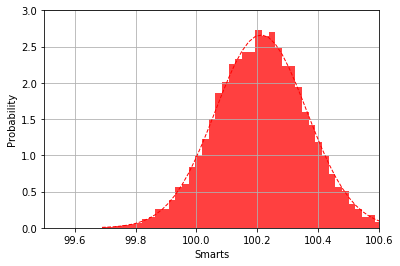

In [2]:
from numpy import *
from numpy.random import randint, randn
from time import time
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Returns mean of bootstrap samples                                                                                                                                                
def stat(data):
    return mean(data)

# Bootstrap algorithm
def bootstrap(data, statistic, R):
    t = zeros(R); n = len(data); inds = arange(n); t0 = time()
    # non-parametric bootstrap         
    for i in range(R):
        t[i] = statistic(data[randint(0,n,n)])

    # analysis    
    print("Runtime: %g sec" % (time()-t0)); print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (statistic(data), std(data),mean(t),std(t)))
    return t


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# bootstrap returns the data sample                                    
t = bootstrap(x, stat, datapoints)
# the histogram of the bootstrapped  data                                                                                                    
n, binsboot, patches = plt.hist(t, 50, normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line  
y = mlab.normpdf( binsboot, mean(t), std(t))
lt = plt.plot(binsboot, y, 'r--', linewidth=1)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.axis([99.5, 100.6, 0, 3.0])
plt.grid(True)

plt.show()

<!-- !split  -->
## Various steps in cross-validation

When the repetitive splitting of the data set is done randomly,
samples may accidently end up in a fast majority of the splits in
either training or test set. Such samples may have an unbalanced
influence on either model building or prediction evaluation. To avoid
this $k$-fold cross-validation structures the data splitting. The
samples are divided into $k$ more or less equally sized exhaustive and
mutually exclusive subsets. In turn (at each split) one of these
subsets plays the role of the test set while the union of the
remaining subsets constitutes the training set. Such a splitting
warrants a balanced representation of each sample in both training and
test set over the splits. Still the division into the $k$ subsets
involves a degree of randomness. This may be fully excluded when
choosing $k=n$. This particular case is referred to as leave-one-out
cross-validation (LOOCV). 

<!-- !split  -->
## How to set up the cross-validation for Ridge and/or Lasso

* Define a range of interest for the penalty parameter.

* Divide the data set into training and test set comprising samples $\{1, \ldots, n\} \setminus i$ and $\{ i \}$, respectively.

* Fit the linear regression model by means of ridge estimation  for each $\lambda$ in the grid using the training set, and the corresponding estimate of the error variance $\boldsymbol{\sigma}_{-i}^2(\lambda)$, as

$$
\begin{align*}
\boldsymbol{\beta}_{-i}(\lambda) & =  ( \boldsymbol{X}_{-i, \ast}^{T}
\boldsymbol{X}_{-i, \ast} + \lambda \boldsymbol{I}_{pp})^{-1}
\boldsymbol{X}_{-i, \ast}^{T} \boldsymbol{y}_{-i}
\end{align*}
$$

* Evaluate the prediction performance of these models on the test set by $\log\{L[y_i, \boldsymbol{X}_{i, \ast}; \boldsymbol{\beta}_{-i}(\lambda), \boldsymbol{\sigma}_{-i}^2(\lambda)]\}$. Or, by the prediction error $|y_i - \boldsymbol{X}_{i, \ast} \boldsymbol{\beta}_{-i}(\lambda)|$, the relative error, the error squared or the R2 score function.

* Repeat the first three steps  such that each sample plays the role of the test set once.

* Average the prediction performances of the test sets at each grid point of the penalty bias/parameter. It is an estimate of the prediction performance of the model corresponding to this value of the penalty parameter on novel data. It is defined as

$$
\begin{align*}
\frac{1}{n} \sum_{i = 1}^n \log\{L[y_i, \mathbf{X}_{i, \ast}; \boldsymbol{\beta}_{-i}(\lambda), \boldsymbol{\sigma}_{-i}^2(\lambda)]\}.
\end{align*}
$$

## Cross-validation in brief

For the various values of $k$

1. shuffle the dataset randomly.

2. Split the dataset into $k$ groups.

3. For each unique group:

a. Decide which group to use as set for test data

b. Take the remaining groups as a training data set

c. Fit a model on the training set and evaluate it on the test set

d. Retain the evaluation score and discard the model


5. Summarize the model using the sample of model evaluation scores

## Code Example for Cross-validation and $k$-fold Cross-validation

The code here uses Ridge regression with cross-validation (CV)  resampling and $k$-fold CV in order to fit a specific polynomial.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

## The bias-variance tradeoff


We will discuss the bias-variance tradeoff in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks. Consider a dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$. 

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}
$$

where $\epsilon$ is normally distributed with mean zero and standard deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$. 

Thereafter we found the parameters $\boldsymbol{\beta}$ by optimizing the means squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

We can rewrite this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

The three terms represent the square of the bias of the learning
method, which can be thought of as the error caused by the simplifying
assumptions built into the method. The second term represents the
variance of the chosen model and finally the last terms is variance of
the error $\boldsymbol{\epsilon}$.

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$. The mean value of $\boldsymbol{\epsilon}$ is by definition equal to zero. Furthermore, the function $f$ is not a stochastics variable, idem for $\boldsymbol{\tilde{y}}$.
We use a more compact notation in terms of the expectation value

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

which, using the abovementioned expectation values can be rewritten as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]+\sigma^2,
$$

that is the rewriting in terms of the so-called bias, the variance of the model $\boldsymbol{\tilde{y}}$ and the variance of $\boldsymbol{\epsilon}$.





## Example code for Bias-Variance tradeoff

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()

## Understanding what happens

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726029
Var: 0.004579219539673836
0.08426840630693411 >= 0.07968918676726029 + 0.004579219539673836 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548984
Var: 0.003215318065760509
0.10398646080125035 >= 0.10077114273548984 + 0.003215318065760509 = 0.10398646080125035
Polynomial degree: 3
Error: 0.06547790180152357
Bias^2: 0.06208238634231953
Var: 0.0033955154592040944
0.06547790180152357 >= 0.06208238634231953 + 0.0033955154592040944 = 0.06547790180152363
Polynomial degree: 4
Error: 0.06844519414009438
Bias^2: 0.06453579006728315
Var: 0.003909404072811231
0.06844519414009438 >= 0.06453579006728315 + 0.003909404072811231 = 0.06844519414009438
Polynomial degree: 5
Error: 0.05227921801205692
Bias^

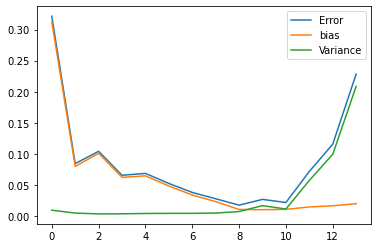

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

<!-- !split  -->
## Summing up




The bias-variance tradeoff summarizes the fundamental tension in
machine learning, particularly supervised learning, between the
complexity of a model and the amount of training data needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias, that is  a model whose asymptotic
performance is worse than another model because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 



The above equations tell us that in
order to minimize the expected test error, we need to select a
statistical learning method that simultaneously achieves low variance
and low bias. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.


What do we mean by the variance and bias of a statistical learning
method? The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large changes in the model. In general, more
flexible statistical methods have higher variance.


You may also find this recent [article](https://www.pnas.org/content/116/32/15849) of interest.

## Another Example from Scikit-Learn's Repository

In [30]:
"""
============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## More examples on bootstrap and cross-validation and errors

In [31]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)

trials = 100
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)

# loop over trials in order to estimate the expectation value of the MSE
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        x_train, x_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
        model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred) 

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
    print("Degree of polynomial: %3d"% polynomial[polydegree])
    print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
    print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

<!-- !split  -->
## The same example but now with cross-validation

In [32]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
estimated_mse_sklearn = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
k =5
kfold = KFold(n_splits = k)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)
        OLS = LinearRegression()
# loop over trials in order to estimate the expectation value of the MSE
    estimated_mse_folds = cross_val_score(OLS, X, Energies, scoring='neg_mean_squared_error', cv=kfold)
#[:, np.newaxis]
    estimated_mse_sklearn[polydegree] = np.mean(-estimated_mse_folds)

plt.plot(polynomial, np.log10(estimated_mse_sklearn), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

## Cross-validation with Ridge

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
np.random.seed(3155)
# Generate the data.
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 10)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    estimated_mse_folds = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)
    i += 1
plt.figure()
plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## The Ising model

The one-dimensional Ising model with nearest neighbor interaction, no
external field and a constant coupling constant $J$ is given by

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
    H = -J \sum_{k}^L s_k s_{k + 1},
\label{_auto11} \tag{21}
\end{equation}
$$

where $s_i \in \{-1, 1\}$ and $s_{N + 1} = s_1$. The number of spins
in the system is determined by $L$. For the one-dimensional system
there is no phase transition.

We will look at a system of $L = 40$ spins with a coupling constant of
$J = 1$. To get enough training data we will generate 10000 states
with their respective energies.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.linalg as scl
from sklearn.model_selection import train_test_split
import tqdm
sns.set(color_codes=True)
cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

L = 40
n = int(1e4)

spins = np.random.choice([-1, 1], size=(n, L))
J = 1.0

energies = np.zeros(n)

for i in range(n):
    energies[i] = - J * np.dot(spins[i], np.roll(spins[i], 1))

Here we use ordinary least squares
regression to predict the energy for the nearest neighbor
one-dimensional Ising model on a ring, i.e., the endpoints wrap
around. We will use linear regression to fit a value for
the coupling constant to achieve this.

## Reformulating the problem to suit regression

A more general form for the one-dimensional Ising model is

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
    H = - \sum_j^L \sum_k^L s_j s_k J_{jk}.
\label{_auto12} \tag{22}
\end{equation}
$$

Here we allow for interactions beyond the nearest neighbors and a state dependent
coupling constant. This latter expression can be formulated as
a matrix-product

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
    \boldsymbol{H} = \boldsymbol{X} J,
\label{_auto13} \tag{23}
\end{equation}
$$

where $X_{jk} = s_j s_k$ and $J$ is a matrix which consists of the
elements $-J_{jk}$. This form of writing the energy fits perfectly
with the form utilized in linear regression, that is

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
    \boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon},
\label{_auto14} \tag{24}
\end{equation}
$$

We split the data in training and test data as discussed in the previous example

In [35]:
X = np.zeros((n, L ** 2))
for i in range(n):
    X[i] = np.outer(spins[i], spins[i]).ravel()
y = energies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear regression

In the ordinary least squares method we choose the cost function

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
    C(\boldsymbol{X}, \boldsymbol{\beta})= \frac{1}{n}\left\{(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})^T(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})\right\}.
\label{_auto15} \tag{25}
\end{equation}
$$

We then find the extremal point of $C$ by taking the derivative with respect to $\boldsymbol{\beta}$ as discussed above.
This yields the expression for $\boldsymbol{\beta}$ to be

$$
\boldsymbol{\beta} = \frac{\boldsymbol{X}^T \boldsymbol{y}}{\boldsymbol{X}^T \boldsymbol{X}},
$$

which immediately imposes some requirements on $\boldsymbol{X}$ as there must exist
an inverse of $\boldsymbol{X}^T \boldsymbol{X}$. If the expression we are modeling contains an
intercept, i.e., a constant term, we must make sure that the
first column of $\boldsymbol{X}$ consists of $1$. We do this here

In [36]:
X_train_own = np.concatenate(
    (np.ones(len(X_train))[:, np.newaxis], X_train),
    axis=1
)
X_test_own = np.concatenate(
    (np.ones(len(X_test))[:, np.newaxis], X_test),
    axis=1
)

In [37]:
def ols_inv(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return scl.inv(x.T @ x) @ (x.T @ y)
beta = ols_inv(X_train_own, y_train)

## Singular Value decomposition

Doing the inversion directly turns out to be a bad idea since the matrix
$\boldsymbol{X}^T\boldsymbol{X}$ is singular. An alternative approach is to use the **singular
value decomposition**. Using the definition of the Moore-Penrose
pseudoinverse we can write the equation for $\boldsymbol{\beta}$ as

$$
\boldsymbol{\beta} = \boldsymbol{X}^{+}\boldsymbol{y},
$$

where the pseudoinverse of $\boldsymbol{X}$ is given by

$$
\boldsymbol{X}^{+} = \frac{\boldsymbol{X}^T}{\boldsymbol{X}^T\boldsymbol{X}}.
$$

Using singular value decomposition we can decompose the matrix  $\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma} \boldsymbol{V}^T$,
where $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal(unitary) matrices and $\boldsymbol{\Sigma}$ contains the singular values (more details below).
where $X^{+} = V\Sigma^{+} U^T$. This reduces the equation for
$\omega$ to

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}
    \boldsymbol{\beta} = \boldsymbol{V}\boldsymbol{\Sigma}^{+} \boldsymbol{U}^T \boldsymbol{y}.
\label{_auto16} \tag{26}
\end{equation}
$$

Note that solving this equation by actually doing the pseudoinverse
(which is what we will do) is not a good idea as this operation scales
as $\mathcal{O}(n^3)$, where $n$ is the number of elements in a
general matrix. Instead, doing $QR$-factorization and solving the
linear system as an equation would reduce this down to
$\mathcal{O}(n^2)$ operations.

In [38]:
def ols_svd(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    u, s, v = scl.svd(x)
    return v.T @ scl.pinv(scl.diagsvd(s, u.shape[0], v.shape[0])) @ u.T @ y

In [39]:
beta = ols_svd(X_train_own,y_train)

When extracting the $J$-matrix  we need to make sure that we remove the intercept, as is done here

In [40]:
J = beta[1:].reshape(L, L)

A way of looking at the coefficients in $J$ is to plot the matrices as images.

In [41]:
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J, **cmap_args)
plt.title("OLS", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)
plt.show()

It is interesting to note that OLS
considers both $J_{j, j + 1} = -0.5$ and $J_{j, j - 1} = -0.5$ as
valid matrix elements for $J$.
In our discussion below on hyperparameters and Ridge and Lasso regression we will see that
this problem can be removed, partly and only with Lasso regression. 

In this case our matrix inversion was actually possible. The obvious question now is what is the mathematics behind the SVD?





## The one-dimensional Ising model

Let us bring back the Ising model again, but now with an additional
focus on Ridge and Lasso regression as well. We repeat some of the
basic parts of the Ising model and the setup of the training and test
data.  The one-dimensional Ising model with nearest neighbor
interaction, no external field and a constant coupling constant $J$ is
given by

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
    H = -J \sum_{k}^L s_k s_{k + 1},
\label{_auto17} \tag{27}
\end{equation}
$$

where $s_i \in \{-1, 1\}$ and $s_{N + 1} = s_1$. The number of spins in the system is determined by $L$. For the one-dimensional system there is no phase transition.

We will look at a system of $L = 40$ spins with a coupling constant of $J = 1$. To get enough training data we will generate 10000 states with their respective energies.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.linalg as scl
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
import tqdm
sns.set(color_codes=True)
cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

L = 40
n = int(1e4)

spins = np.random.choice([-1, 1], size=(n, L))
J = 1.0

energies = np.zeros(n)

for i in range(n):
    energies[i] = - J * np.dot(spins[i], np.roll(spins[i], 1))

A more general form for the one-dimensional Ising model is

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}
    H = - \sum_j^L \sum_k^L s_j s_k J_{jk}.
\label{_auto18} \tag{28}
\end{equation}
$$

Here we allow for interactions beyond the nearest neighbors and a more
adaptive coupling matrix. This latter expression can be formulated as
a matrix-product on the form

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation}
    H = X J,
\label{_auto19} \tag{29}
\end{equation}
$$

where $X_{jk} = s_j s_k$ and $J$ is the matrix consisting of the
elements $-J_{jk}$. This form of writing the energy fits perfectly
with the form utilized in linear regression, viz.

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
    \boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}.
\label{_auto20} \tag{30}
\end{equation}
$$

We organize the data as we did above

In [43]:
X = np.zeros((n, L ** 2))
for i in range(n):
    X[i] = np.outer(spins[i], spins[i]).ravel()
y = energies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.96)

X_train_own = np.concatenate(
    (np.ones(len(X_train))[:, np.newaxis], X_train),
    axis=1
)

X_test_own = np.concatenate(
    (np.ones(len(X_test))[:, np.newaxis], X_test),
    axis=1
)

We will do all fitting with **Scikit-Learn**,

In [44]:
clf = skl.LinearRegression().fit(X_train, y_train)

When  extracting the $J$-matrix we make sure to remove the intercept

In [45]:
J_sk = clf.coef_.reshape(L, L)

And then we plot the results

In [46]:
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_sk, **cmap_args)
plt.title("LinearRegression from Scikit-learn", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)
plt.show()

The results perfectly with our previous discussion where we used our own code.

## Ridge regression

Having explored the ordinary least squares we move on to ridge
regression. In ridge regression we include a **regularizer**. This
involves a new cost function which leads to a new estimate for the
weights $\boldsymbol{\beta}$. This results in a penalized regression problem. The
cost function is given by

1
7
7
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

In [47]:
_lambda = 0.1
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train, y_train)
J_ridge_sk = clf_ridge.coef_.reshape(L, L)
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_ridge_sk, **cmap_args)
plt.title("Ridge from Scikit-learn", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)

plt.show()

## LASSO regression

In the **Least Absolute Shrinkage and Selection Operator** (LASSO)-method we get a third cost function.

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
    C(\boldsymbol{X}, \boldsymbol{\beta}; \lambda) = (\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})^T(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}) + \lambda \sqrt{\boldsymbol{\beta}^T\boldsymbol{\beta}}.
\label{_auto22} \tag{32}
\end{equation}
$$

Finding the extremal point of this cost function is not so straight-forward as in least squares and ridge. We will therefore rely solely on the function ``Lasso`` from **Scikit-Learn**.

In [48]:
clf_lasso = skl.Lasso(alpha=_lambda).fit(X_train, y_train)
J_lasso_sk = clf_lasso.coef_.reshape(L, L)
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_lasso_sk, **cmap_args)
plt.title("Lasso from Scikit-learn", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)

plt.show()

It is quite striking how LASSO breaks the symmetry of the coupling
constant as opposed to ridge and OLS. We get a sparse solution with
$J_{j, j + 1} = -1$.



## Performance as  function of the regularization parameter

We see how the different models perform for a different set of values for $\lambda$.

In [49]:
lambdas = np.logspace(-4, 5, 10)

train_errors = {
    "ols_sk": np.zeros(lambdas.size),
    "ridge_sk": np.zeros(lambdas.size),
    "lasso_sk": np.zeros(lambdas.size)
}

test_errors = {
    "ols_sk": np.zeros(lambdas.size),
    "ridge_sk": np.zeros(lambdas.size),
    "lasso_sk": np.zeros(lambdas.size)
}

plot_counter = 1

fig = plt.figure(figsize=(32, 54))

for i, _lambda in enumerate(tqdm.tqdm(lambdas)):
    for key, method in zip(
        ["ols_sk", "ridge_sk", "lasso_sk"],
        [skl.LinearRegression(), skl.Ridge(alpha=_lambda), skl.Lasso(alpha=_lambda)]
    ):
        method = method.fit(X_train, y_train)

        train_errors[key][i] = method.score(X_train, y_train)
        test_errors[key][i] = method.score(X_test, y_test)

        omega = method.coef_.reshape(L, L)

        plt.subplot(10, 5, plot_counter)
        plt.imshow(omega, **cmap_args)
        plt.title(r"%s, $\lambda = %.4f$" % (key, _lambda))
        plot_counter += 1

plt.show()

We see that LASSO reaches a good solution for low
values of $\lambda$, but will "wither" when we increase $\lambda$ too
much. Ridge is more stable over a larger range of values for
$\lambda$, but eventually also fades away.

## Finding the optimal value of $\lambda$

To determine which value of $\lambda$ is best we plot the accuracy of
the models when predicting the training and the testing set. We expect
the accuracy of the training set to be quite good, but if the accuracy
of the testing set is much lower this tells us that we might be
subject to an overfit model. The ideal scenario is an accuracy on the
testing set that is close to the accuracy of the training set.

In [50]:
fig = plt.figure(figsize=(20, 14))

colors = {
    "ols_sk": "r",
    "ridge_sk": "y",
    "lasso_sk": "c"
}

for key in train_errors:
    plt.semilogx(
        lambdas,
        train_errors[key],
        colors[key],
        label="Train {0}".format(key),
        linewidth=4.0
    )

for key in test_errors:
    plt.semilogx(
        lambdas,
        test_errors[key],
        colors[key] + "--",
        label="Test {0}".format(key),
        linewidth=4.0
    )
plt.legend(loc="best", fontsize=18)
plt.xlabel(r"$\lambda$", fontsize=18)
plt.ylabel(r"$R^2$", fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

From the above figure we can see that LASSO with $\lambda = 10^{-2}$
achieves a very good accuracy on the test set. This by far surpasses the
other models for all values of $\lambda$.